In [ ]:
#Datasets
# ratings.csv
# https://drive.google.com/file/d/12yJB_ivy-8TMUBtRF_PXQd_dIikpoQ52/view
# movies.csv
# https://drive.google.com/file/d/1_ed-D9jaIFUimurItNV1nSmb39sBxZ4s/view

In [5]:
import numpy as np
import pandas as pd

In [6]:
movie_names = pd.read_csv("movies.csv")
movie_names.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
ratings_data = pd.read_csv("ratings.csv")
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [9]:
movie_data = pd.merge(ratings_data, movie_names, on='movieId')

In [10]:
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama


# **Criteria** For Popularity Based Recommendation Systems

The criteria is based on:
1. Movies with the highest rating
2. Number of views

### Average ratings of movies

In [11]:
movie_data.groupby('title')['rating'].mean().head()

title
"Great Performances" Cats (1998)           1.750000
$9.99 (2008)                               3.833333
'Hellboy': The Seeds of Creation (2004)    2.000000
'Neath the Arizona Skies (1934)            0.500000
'Round Midnight (1986)                     2.250000
Name: rating, dtype: float64

In [ ]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head(50)

title
Ivan Vasilievich: Back to the Future (Ivan Vasilievich menyaet professiyu) (1973)    5.0
Alien Escape (1995)                                                                  5.0
Boiling Point (1993)                                                                 5.0
Bone Tomahawk (2015)                                                                 5.0
Borgman (2013)                                                                       5.0
Survive and Advance (2013)                                                           5.0
Supercop 2 (Project S) (Chao ji ji hua) (1993)                                       5.0
Last Dragon, The (1985)                                                              5.0
Boy Crazy (2009)                                                                     5.0
Brandon Teena Story, The (1998)                                                      5.0
Straight-Jacket (2004)                                                               5.0
Storefront Hitc

### Ratings count

In [12]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                          341
Pulp Fiction (1994)                          324
Shawshank Redemption, The (1994)             311
Silence of the Lambs, The (1991)             304
Star Wars: Episode IV - A New Hope (1977)    291
Name: rating, dtype: int64

In [ ]:
movie_data[['title','rating']]

,title,rating
0,Dangerous Minds (1995),2.5
1,Dangerous Minds (1995),3.0
2,Dangerous Minds (1995),4.0
3,Dangerous Minds (1995),4.0
4,Dangerous Minds (1995),3.0
...,...,...
99999,War of the Worlds (2005),2.5
100000,"Box, The (2009)",3.5
100001,Pie in the Sky (1996),3.0
100002,Summer Catch (2001),1.0


#### Calculate the average ratings

In [13]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
ratings_mean_count

,rating
title,
"""Great Performances"" Cats (1998)",1.750000
$9.99 (2008),3.833333
'Hellboy': The Seeds of Creation (2004),2.000000
'Neath the Arizona Skies (1934),0.500000
'Round Midnight (1986),2.250000
...,...
xXx (2002),2.478261
xXx: State of the Union (2005),1.000000
¡Three Amigos! (1986),3.258065


#### Calculate the **count** of the ratings and add to the **average ratings** above

In [14]:
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())

In [15]:
ratings_mean_count.head()

,rating,rating_counts
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2


In [16]:
ratings_mean_count['rating'] = round(ratings_mean_count['rating'],1)

In [18]:
ratings_mean_count.tail()

,rating,rating_counts
title,,
xXx (2002),2.5,23
xXx: State of the Union (2005),1.0,1
¡Three Amigos! (1986),3.3,31
À nous la liberté (Freedom for Us) (1931),4.5,1
İtirazım Var (2014),3.5,1


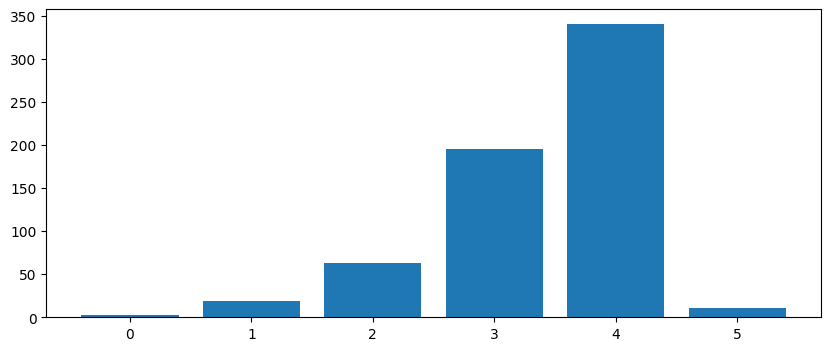

In [20]:
#plot rounded-up ratings with number of movies
import matplotlib.pyplot as plt

plt.figure(figsize =(10, 4))
ax=plt.bar(ratings_mean_count['rating'].round(),ratings_mean_count['rating_counts'])
plt.show()

In [21]:
ratings_mean_count = ratings_mean_count[(ratings_mean_count['rating'] > 3) & (ratings_mean_count['rating_counts'] > 100)]
ratings_mean_count

,rating,rating_counts
title,,
2001: A Space Odyssey (1968),3.9,123
Airplane! (1980),3.8,106
Aladdin (1992),3.7,215
Alien (1979),4.0,127
Aliens (1986),3.9,125
...,...,...
While You Were Sleeping (1995),3.4,101
Who Framed Roger Rabbit? (1988),3.7,108
Willy Wonka & the Chocolate Factory (1971),3.8,148


In [ ]:
ratings_mean_count = ratings_mean_count.sort_values(by= 'rating',ascending=False).head(10)
#so ratings_mean_count now shows the top 10 movies with a rating above 3 and more than 100 ratings  
ratings_mean_count

,rating,rating_counts
title,,
"Godfather, The (1972)",4.5,200
"Shawshank Redemption, The (1994)",4.5,311
"Usual Suspects, The (1995)",4.4,201
"Godfather: Part II, The (1974)",4.4,135
Pulp Fiction (1994),4.3,324
Fargo (1996),4.3,224
One Flew Over the Cuckoo's Nest (1975),4.3,144
Schindler's List (1993),4.3,244
Taxi Driver (1976),4.2,118
